# House Price Prediction

Need to go back through and make adjustments to it

In [4]:
## import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [5]:
## import the data
df = pd.read_csv("C:\\Users\\boydd\\Downloads\\train (1).csv")

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
correlation = df.corr()

In [11]:
# Load the model and fit before doing feature engineering
from sklearn.ensemble import GradientBoostingRegressor


In [13]:
# There are a lot of columns, i will look at columns that have categorical values
df['MSZoning'].value_counts()

# possible values are RL, RM, FV, RH, C (all)
# Map these values to columns
df = pd.get_dummies(df, columns=["MSZoning"])

In [14]:
df = df.drop(['Alley','MiscFeature'], axis=1)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 83 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1460 non-null   int64  
 1   MSSubClass        1460 non-null   int64  
 2   LotFrontage       1201 non-null   float64
 3   LotArea           1460 non-null   int64  
 4   Street            1460 non-null   object 
 5   LotShape          1460 non-null   object 
 6   LandContour       1460 non-null   object 
 7   Utilities         1460 non-null   object 
 8   LotConfig         1460 non-null   object 
 9   LandSlope         1460 non-null   object 
 10  Neighborhood      1460 non-null   object 
 11  Condition1        1460 non-null   object 
 12  Condition2        1460 non-null   object 
 13  BldgType          1460 non-null   object 
 14  HouseStyle        1460 non-null   object 
 15  OverallQual       1460 non-null   int64  
 16  OverallCond       1460 non-null   int64  


In [15]:
# Fill fence, PoolQC, FireplaceQu Nulls with 0
df['PoolQC'] = df['PoolQC'].fillna(0)
df['Fence'] = df['Fence'].fillna(0)
df['FireplaceQu'] = df['FireplaceQu'].fillna(0)

In [16]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

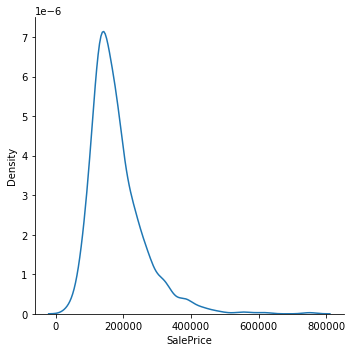

In [17]:
sns.displot(df['SalePrice'], kind='kde')

In [25]:
# Can see the SalePrice is skewed 
# May want to log transform it
df.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,1,60,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2,2008,WD,Normal,208500,0,0,0,1,0
1,2,20,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,5,2007,WD,Normal,181500,0,0,0,1,0
2,3,60,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,9,2008,WD,Normal,223500,0,0,0,1,0
3,4,70,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,2,2006,WD,Abnorml,140000,0,0,0,1,0
4,5,60,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,12,2008,WD,Normal,250000,0,0,0,1,0


In [18]:
df.corr()['SalePrice'].sort_values(ascending = False)
# OverallQuall, GrLivArea, GarageCars, GarageArea, TotalBsmtSF are most important

SalePrice           1.000000
OverallQual         0.790982
GrLivArea           0.708624
GarageCars          0.640409
GarageArea          0.623431
TotalBsmtSF         0.613581
1stFlrSF            0.605852
FullBath            0.560664
TotRmsAbvGrd        0.533723
YearBuilt           0.522897
YearRemodAdd        0.507101
GarageYrBlt         0.486362
MasVnrArea          0.477493
Fireplaces          0.466929
BsmtFinSF1          0.386420
LotFrontage         0.351799
WoodDeckSF          0.324413
2ndFlrSF            0.319334
OpenPorchSF         0.315856
HalfBath            0.284108
LotArea             0.263843
MSZoning_RL         0.245063
BsmtFullBath        0.227122
BsmtUnfSF           0.214479
BedroomAbvGr        0.168213
ScreenPorch         0.111447
PoolArea            0.092404
MSZoning_FV         0.089950
MoSold              0.046432
3SsnPorch           0.044584
BsmtFinSF2         -0.011378
BsmtHalfBath       -0.016844
MiscVal            -0.021190
Id                 -0.021917
LowQualFinSF  

In [51]:
pd.options.display.max_columns = 82

In [59]:
df['LotConfig'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [19]:
from sklearn.preprocessing import OneHotEncoder

In [20]:
# This will hold all categorical variables
cat = df.select_dtypes(include='O').keys()
cat

Index(['Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

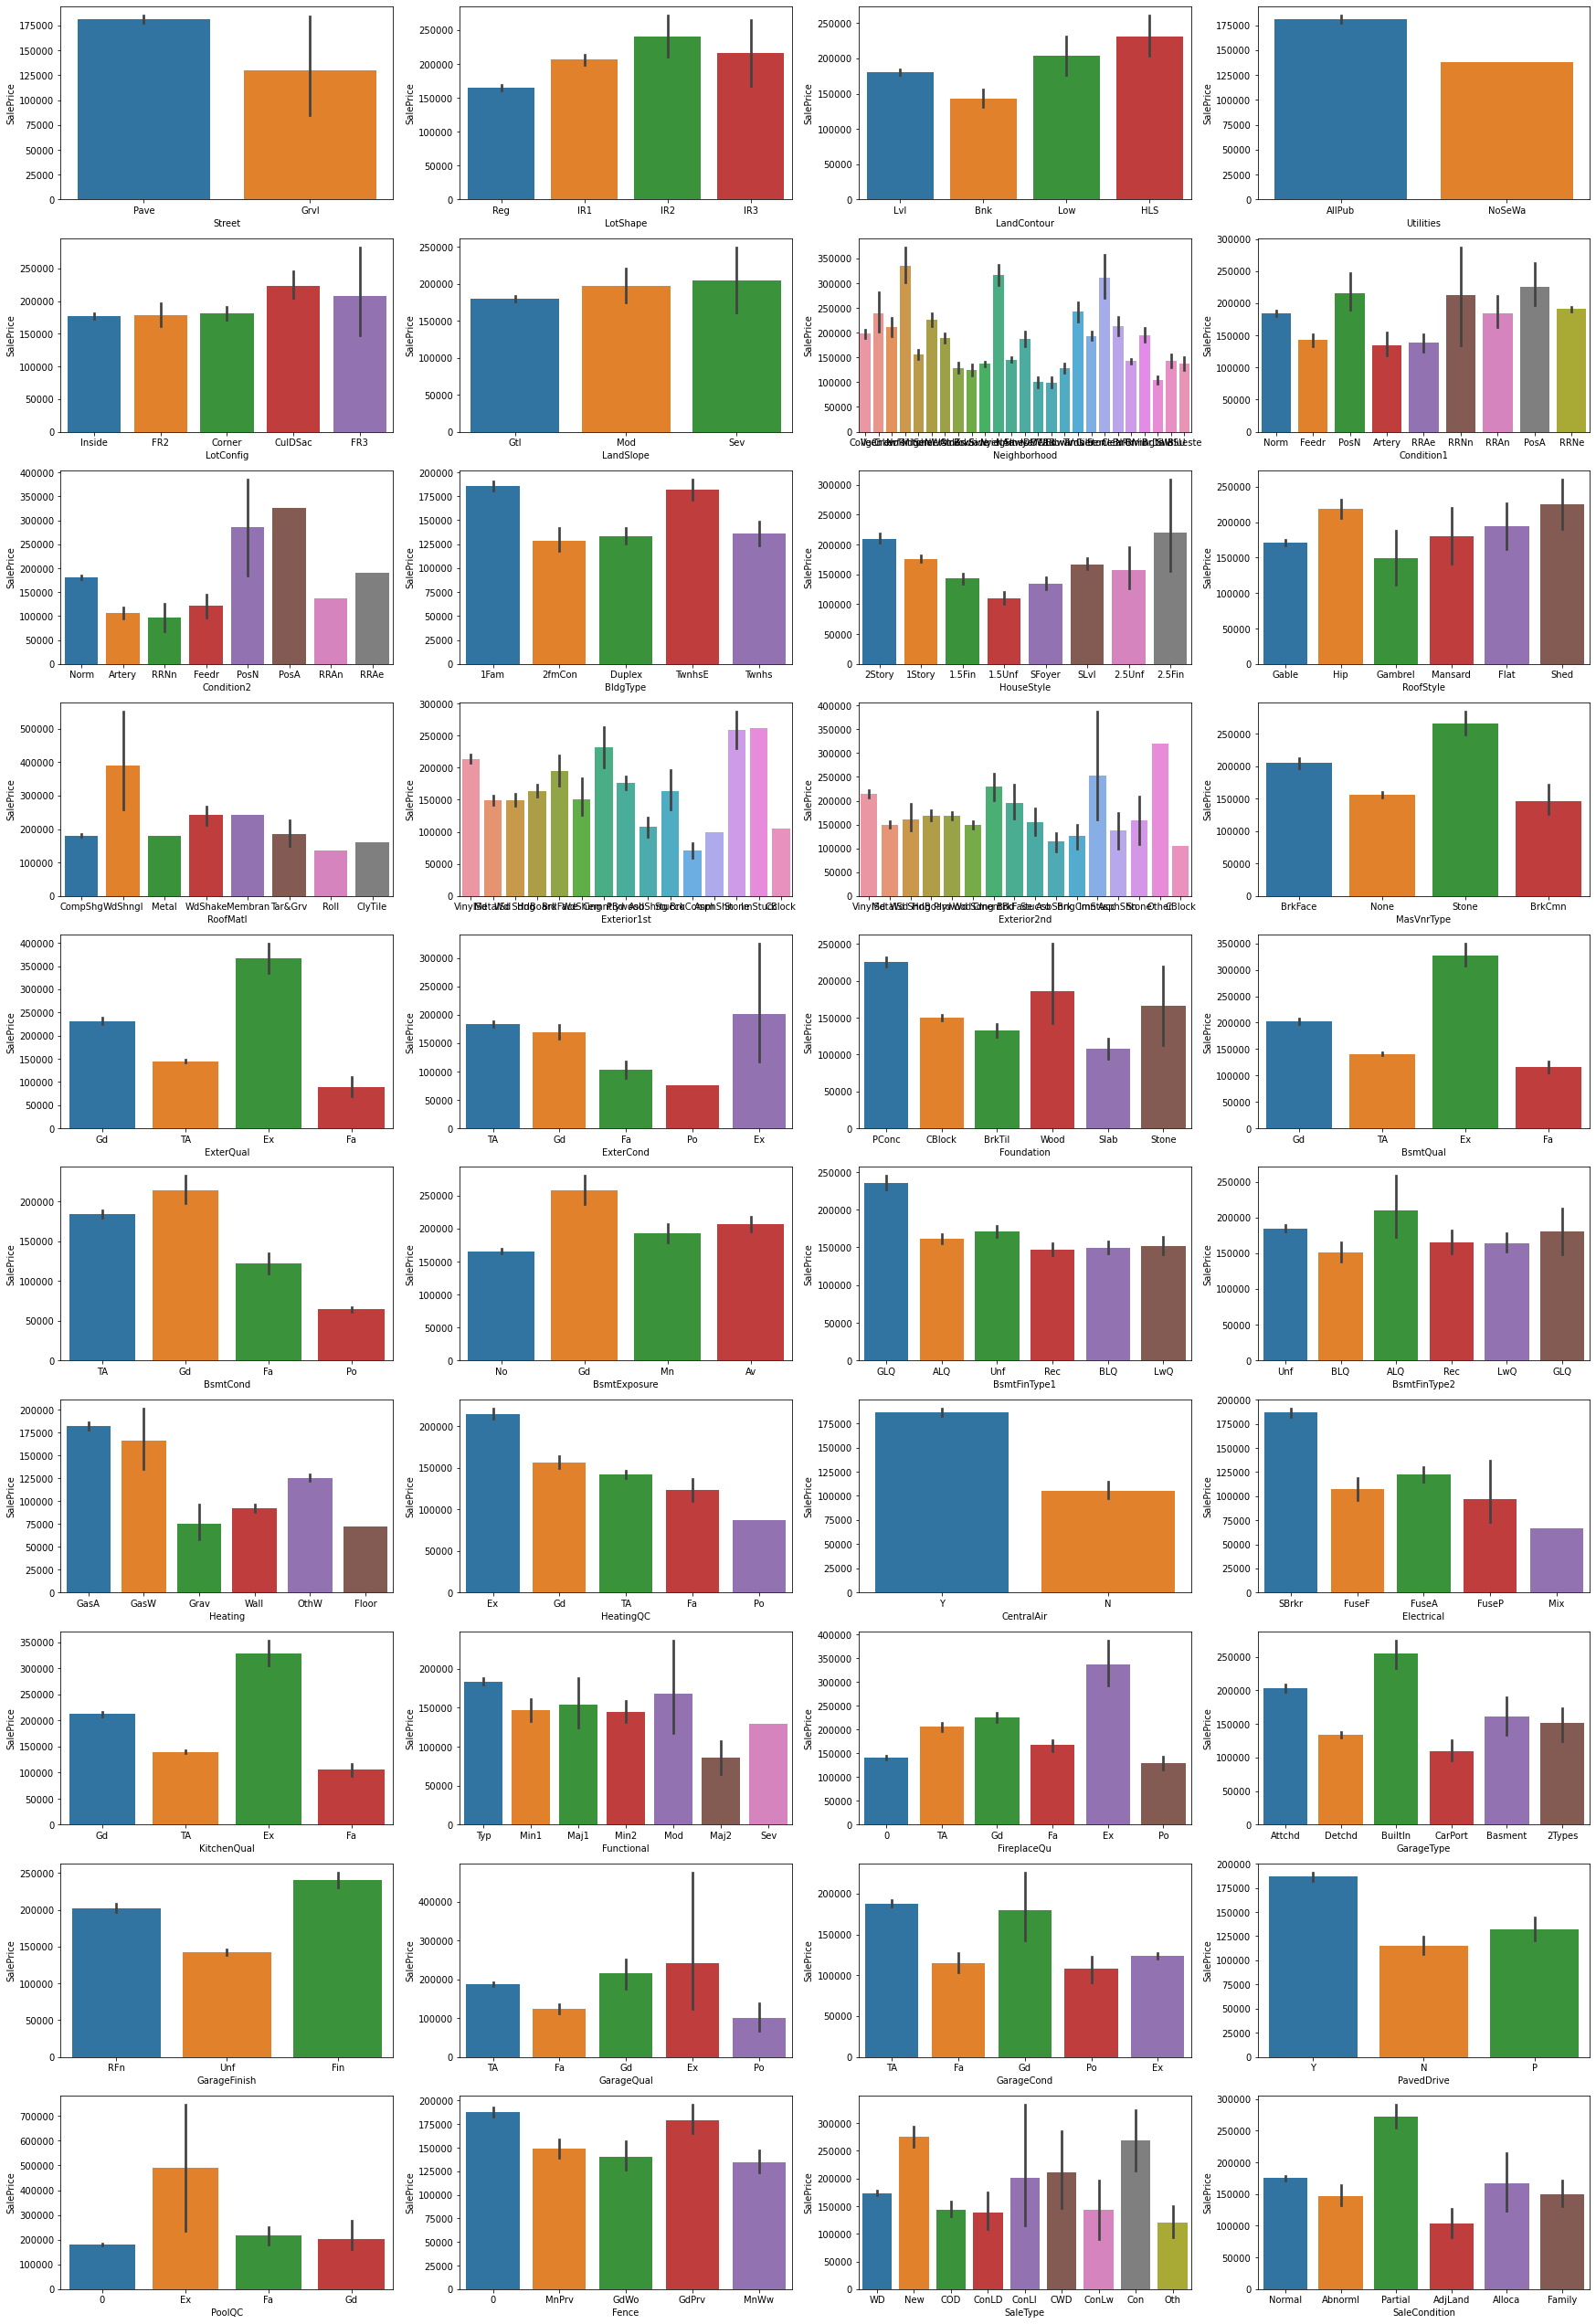

In [29]:
# plotting all categorical columns vs saleprice

plt.figure(figsize= (30,60))
for i,col in enumerate(cat):
    plt.subplot(13,4,i+1)
    sns.barplot(x=col, y="SalePrice", data=df)
    
    
# In LotShape, IR2 is higher, in landContour, Bnk is lower, 

In [21]:
# create a function that will be used to one hot encode all of the categorical columns
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [22]:
# Get a list of all columns and their type
df = one_hot_encoder(df, cat, drop_first=True)

In [32]:
# Map all categorical columns at once
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0


In [23]:
df.isnull().sum()
df = df.dropna()

In [34]:
df.shape

(1121, 247)

In [24]:
# separate data into lables, X and y
X = df.drop(['SalePrice'], axis=1)
y = np.log(df['SalePrice'])

In [36]:
X.isnull().sum()

Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 246, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [26]:
model = GradientBoostingRegressor()

In [27]:
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [28]:
training_prediction = model.predict(X_train)

In [29]:
score_1 = metrics.r2_score(y_train, training_prediction)

In [30]:
score_2 = metrics.mean_absolute_error(y_train, training_prediction)

print("R2: ", score_1)
print("MAE: ", score_2)

R2:  0.9726552001002253
MAE:  0.05016855805527213


In [87]:
np.exp(training_prediction)

array([178420.38507443, 195290.49180039, 272897.08443945, 160578.05837398,
       127873.42318098, 157146.2241754 , 134331.51608794, 208862.19851879,
       353133.61574245,  46455.92539016, 182463.79358074, 293450.16448201,
       271198.57633695, 172675.48367114, 190605.28755546, 153980.21548953,
       141460.62345074, 128108.14505803, 148100.86315883, 183902.66750857,
       182235.59253427, 152387.96898541, 129979.57074305, 268906.09614227,
       212036.22462261, 171274.28189442, 289934.61844195, 335611.07710795,
       106577.54082586, 137457.52255011, 162952.98380828, 118427.85289028,
       141395.28131237, 134201.15117043, 214976.59619923, 137820.99776017,
       118885.35484442, 126222.98869511, 112724.33452652, 178575.00478344,
       130191.61918668, 255423.23385405, 243553.86996414, 312599.05082078,
       254949.69830931, 368727.50509808, 156602.18153539, 293582.86905253,
       183927.48108296, 110931.62245153, 171095.96342429, 169385.7884107 ,
       124874.68181912, 1

In [31]:
test_pred = model.predict(X_test)

In [32]:
score_3 = metrics.r2_score(y_test, test_pred)
score_4 = metrics.mean_absolute_error(y_test, test_pred)
print(score_3, "\n", score_4)

0.8642294764762086 
 0.09724334037145073


In [33]:
### Now see how test holds up
df_test = pd.read_csv("C:\\Users\\boydd\\Downloads\\test (1).csv")

In [34]:
df_test = df_test.drop(['Alley', 'MiscFeature'], axis=1)

In [35]:
df_test = pd.get_dummies(df_test, columns=["MSZoning"])

In [36]:
cat_test = df_test.select_dtypes(include='O').keys()

In [37]:
df_test = one_hot_encoder(df_test, cat_test, drop_first=True)

In [38]:
df_test = df_test.fillna(0)

In [39]:
missing_cols = set(df.columns) - set(df_test.columns)

In [40]:
for c in missing_cols:
    df_test[c] = 0

# ensure the order of the test columns is the same in the training set
df_test = df_test[df.columns]

In [41]:
missing_cols_train = set(df_test.columns) - set(X.columns)
missing_cols_train

{'SalePrice'}

In [42]:
df_test = df_test.drop(['SalePrice'],axis=1)

In [85]:
model.predict(df_test)

array([11.73002937, 11.93633382, 12.14683474, ..., 12.01392884,
       11.77045135, 12.40273948])

In [88]:
predictions = model.predict(df_test)

In [89]:
predictions = np.exp(predictions)

In [90]:
sub = pd.DataFrame()
sub['Id'] = df_test.Id

In [91]:
sub['SalePrice'] = predictions
sub.head()

,Id,SalePrice
0,1461,124247.319233
1,1462,152715.778637
2,1463,188496.504851
3,1464,184677.432485
4,1465,195361.765011


In [92]:
sub.to_csv("C:\\Users\\boydd\\Downloads\\Housing_Submission1.csv", index=False)

In [57]:
df_test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,0,1,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,0,1,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,0,1,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,0,1,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,0,1,0,0,0,1,0


In [3]:
# Different regression models to try

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV

In [43]:
# Ada Boost
tuned_parameters = [{'learning_rate': [0.1,1,2,3,4,5], 'n_estimators': [100,200,300,400,500]}]
MSE_ada = ['mean_squared_error(y_test,y_pred3)']
for value in MSE_ada:
    adaregr = GridSearchCV(AdaBoostRegressor(), tuned_parameters,cv=4)
    adaregr.fit(X_train, y_train)
    y_true, y_pred3 = y_test, adaregr.predict(X_test)

print('The best hyper parameters for AdaBoost are: ', adaregr.best_params_)

The best hyper parameters for AdaBoost are:  {'learning_rate': 3, 'n_estimators': 500}


In [66]:
ada = AdaBoostRegressor(n_estimators=500,learning_rate=3)
ada.fit(X_train,y_train)
ada_train_preds = ada.predict(X_train)

In [67]:
ada_preds = ada.predict(X_test)
print('R2: ', metrics.r2_score(y_test, ada_preds))
print('MAE: ', metrics.mean_absolute_error(y_test, ada_preds))

R2:  0.8339150004267976
MAE:  0.10947873032448743


Ada is slightly worse than the gradient boosting model

In [50]:
# Decision Tree
tuned_parameters = [{'max_depth': [1,2,3,4,5,10,15,20,25,50,100]}]
MSE_dt = ['mean_squared_error(y_test,y_pred4)']
for value in MSE_dt:
    reg_tree = GridSearchCV(DecisionTreeRegressor(), tuned_parameters, cv=4)
    reg_tree.fit(X_train,y_train)
    y_true, y_pred4 = y_test, reg_tree.predict(X_test)
print('The optimum max_depth: ', reg_tree.best_params_)

The optimum max_depth:  {'max_depth': 5}


In [51]:
# Train the decision tree with max depth 5
tree_reg = DecisionTreeRegressor(max_depth = 5)
tree_reg.fit(X_train, y_train)
tree_preds = tree_reg.predict(X_test)
print('R2: ', metrics.r2_score(y_test, tree_preds))
print('MAE: ', metrics.mean_absolute_error(y_test, tree_preds))

R2:  0.7099914778026442
MAE:  0.1524645846155484


Much worse than the previous models

In [52]:
# Random forest
tuned_parameters = [{'max_depth': [5,10,15,20,50], 'n_estimators': [10,25,50,100,150,200]}]
MSE_rf = ['mean_squared_error(y_test, y_pred5)']
for value in MSE_rf:
    reg_rf = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=4)
    reg_rf.fit(X_train, y_train)
    y_true, y_preds5 = y_test, reg_rf.predict(X_test)
    
print('Best Hyper-params: ', reg_rf.best_params_)

Best Hyper-params:  {'max_depth': 15, 'n_estimators': 200}


In [53]:
rf_reg = RandomForestRegressor(max_depth = 15, n_estimators = 200)
rf_reg.fit(X_train, y_train)
rf_preds = rf_reg.predict(X_test)
print('R2: ', metrics.r2_score(y_test, rf_preds))
print('MAE: ', metrics.mean_absolute_error(y_test, rf_preds))

R2:  0.8321580352109955
MAE:  0.10734425958799132


In [56]:
# Gradient Boost
tuned_parameters = [{'max_depth': [3,5,10,15,20], 'n_estimators': [100,200,300,400,500]}]
MSE_gr = ['mean_squared_error(y_test,y_pred6)']
for value in MSE_gr:
    grb_regr = GridSearchCV(GradientBoostingRegressor(), tuned_parameters,cv=4)
    grb_regr.fit(X_train, y_train)
    y_true, y_pred6 = y_test, grb_regr.predict(X_test)

print('The best hyper parameters for gradient boosting are: ', grb_regr.best_params_)

The best hyper parameters for gradient boosting are:  {'max_depth': 3, 'n_estimators': 500}


In [57]:
revised_grb = GradientBoostingRegressor(max_depth = 3, n_estimators = 500)
revised_grb.fit(X_train, y_train)
rev_preds = revised_grb.predict(X_test)
print('R2: ', metrics.r2_score(y_test, rev_preds))
print('MAE: ', metrics.mean_absolute_error(y_test, rev_preds))

R2:  0.8694990353697664
MAE:  0.09504006851904843


This is even higher than before

In [59]:
rev_test_preds = revised_grb.predict(df_test)

In [60]:
rev_test_preds = np.exp(rev_test_preds)

In [61]:
sub2 = pd.DataFrame()
sub2['Id'] = df_test.Id

In [63]:
sub2['SalePrice'] = rev_test_preds
sub2.head()

,Id,SalePrice
0,1461,130730.259637
1,1462,160932.836274
2,1463,189992.548438
3,1464,184836.828041
4,1465,192469.867058


In [65]:
sub2.to_csv("C:\\Users\\boydd\\Downloads\\Housing_Submission2.csv", index=False)